In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from cancer_games import CancerGame
from fears.utils import plotter

cc = plotter.gen_color_cycler(style='solid',n_colors=4,palette='colorblind')
cc_dict = cc.by_key()
c = cc_dict['color']

color_list = cc.by_key()['color']

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

gef_max = 1.8*10**-6


/Users/eshanking/repos/msw_analysis/cancer_games.py:712: RuntimeWarning: invalid value encountered in scalar power
  y = gmax + ((gmin - gmax) * conc**hc) / (ic_50**hc + conc**hc)


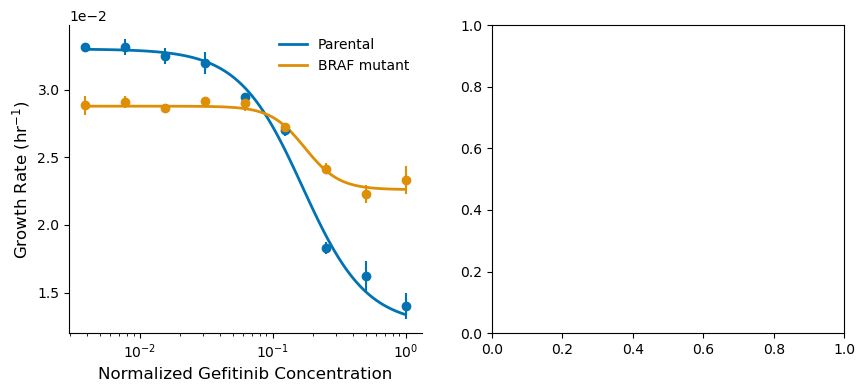

In [110]:
parental_dr_params = []

exp_folder = 'data/1_Game_parental_vs_braf_Gef_091222'

cg = CancerGame(exp_folder)
cg.execute()

fig,ax_list = plt.subplots(ncols=2,figsize=(10,4))

data = cg.fitness_parental
dr_params = cg.parental_dr_params

parental_dr_params.append(dr_params)

ax = ax_list[0]

ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',label='Parental',
            color=color_list[0])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)


yfit = cg.hill_fn(xfit,*dr_params[0])
ax.plot(xfit,yfit,color=color_list[0],label='Parental',linewidth=2)

data = cg.fitness_resistant
dr_params = cg.mutant_dr_params

braf_dr_params = dr_params

ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',label='BRAF',
            color=color_list[1])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)
yfit = cg.hill_fn(xfit,*dr_params[1])
ax.plot(xfit,yfit,color=color_list[1],label='BRAF mutant',linewidth=2)

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized Gefitinib Concentration',fontsize=12)
ax.set_ylabel('Growth Rate (hr$^{-1}$)',fontsize=12)

handles,labels = ax.get_legend_handles_labels()

ax.legend(handles[0:2],labels[0:2],frameon=False)

ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

fig.savefig('figures/BRAF_dose_response.png',dpi=600,bbox_inches='tight')


/Users/eshanking/repos/msw_analysis/cancer_games.py:233: RuntimeWarning: divide by zero encountered in log
  ax.plot(time,np.log(green_data),color='tab:cyan',linewidth=2.5)


(<Figure size 1200x800 with 60 Axes>, <AxesSubplot:>)

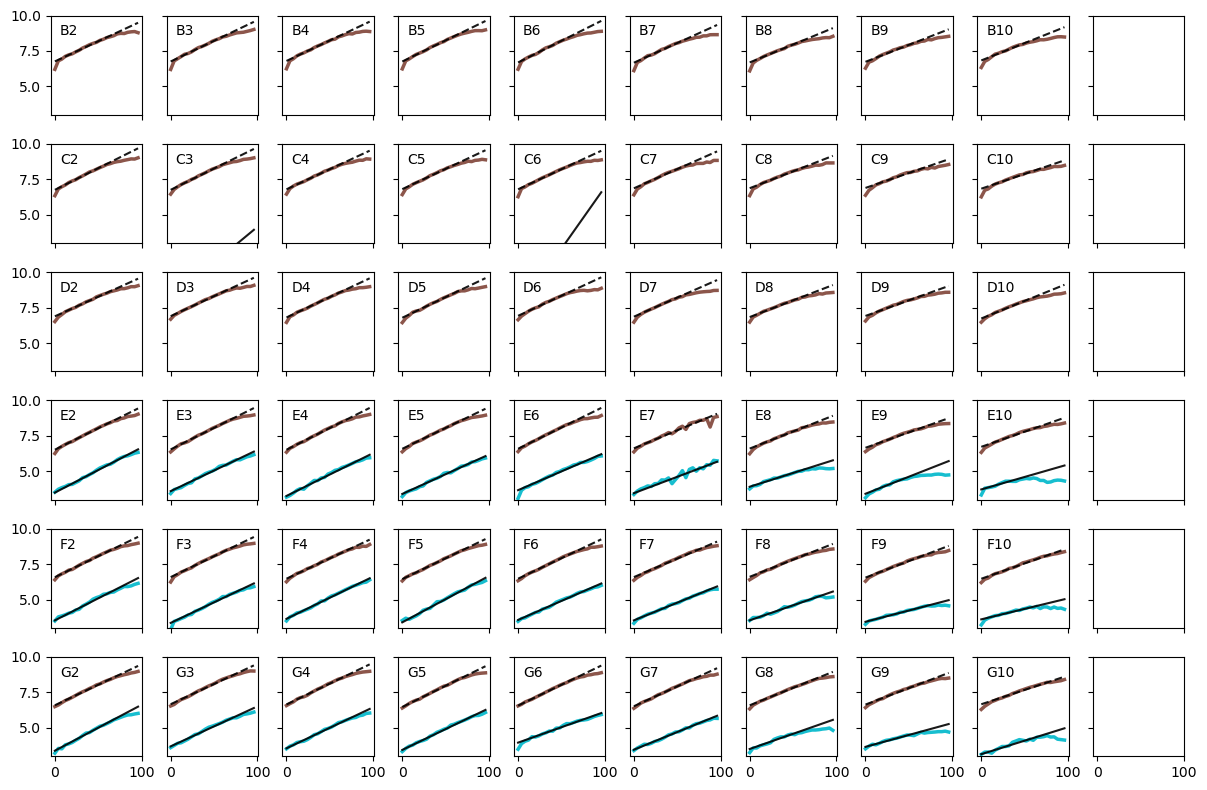

In [111]:
cg.plot_plate(plate_num=0,plot_fit=True)

In [112]:
exp_folder = 'data/7_parental_vs_kras_braf_DM_Gef'

proportions = [1,0.9,1,0.9,0.7,0.5,0.3,0.1,0.05,0] # account for plate 1 and plate 1b

cg = CancerGame(exp_folder,red_key='Count_bfp_objects',
                proportions=proportions)

# cg.plot_plate(plot_fit=True)

cg.execute()

# fig,ax = plt.subplots(figsize=(5,4))

ax = ax_list[1]

data = cg.fitness_parental
dr_params = cg.parental_dr_params

parental_dr_params.append(dr_params)

ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',
            color=color_list[0])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)

yfit = cg.hill_fn(xfit,*dr_params[0])
ax.plot(xfit,yfit,color=color_list[0],label='Parental',linewidth=2)

data = cg.fitness_resistant
dr_params = cg.mutant_dr_params

kras_braf_dr_params = dr_params

ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',
            color=color_list[1])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)
yfit = cg.hill_fn(xfit,*dr_params[1])
ax.plot(xfit,yfit,color=color_list[1],label='KRAS-BRAF double mutant',linewidth=2)

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized Gefitinib Concentration',fontsize=12)
ax.set_ylabel('Growth Rate (hr$^{-1}$)',fontsize=12)
ax.legend(frameon=False)

ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# shift right column to the right

pos = ax.get_position()
pos.x0 += 0.07
pos.x1 += 0.07
ax.set_position(pos)

fig.savefig('figures/combined_dose_response.png',dpi=600,bbox_inches='tight')


/Users/eshanking/repos/msw_analysis/cancer_games.py:712: RuntimeWarning: invalid value encountered in scalar power
  y = gmax + ((gmin - gmax) * conc**hc) / (ic_50**hc + conc**hc)
/Users/eshanking/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/Users/eshanking/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


/Users/eshanking/repos/msw_analysis/cancer_games.py:712: RuntimeWarning: invalid value encountered in scalar power
  y = gmax + ((gmin - gmax) * conc**hc) / (ic_50**hc + conc**hc)


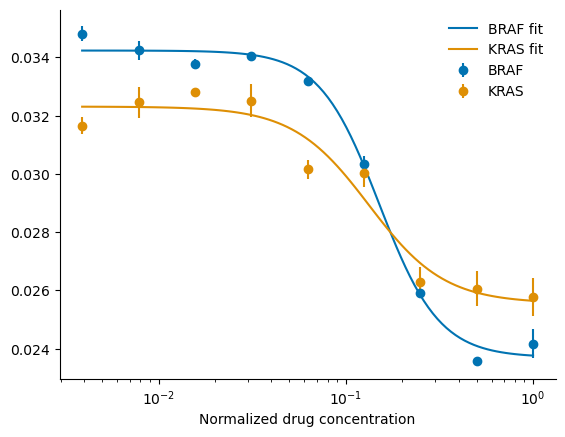

In [113]:
exp_folder = 'data/5_Game_braf_vs_kras_Gef_112222'

cg = CancerGame(exp_folder,use_sigma=False)
cg.execute()

fig,ax = plt.subplots()

data = cg.fitness_parental
dr_params = cg.parental_dr_params

ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',label='BRAF',
            color=color_list[0])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)

yfit = cg.hill_fn(xfit,*dr_params[0])
ax.plot(xfit,yfit,color=color_list[0],label='BRAF fit')

data = cg.fitness_resistant
dr_params = cg.mutant_dr_params

kras_dr_params_old = dr_params

ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',label='KRAS',
            color=color_list[1])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)
yfit = cg.hill_fn(xfit,*dr_params[1])
ax.plot(xfit,yfit,color=color_list[1],label='KRAS fit')

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized drug concentration')
ax.legend(frameon=False)


/Users/eshanking/repos/msw_analysis/cancer_games.py:712: RuntimeWarning: invalid value encountered in scalar power
  y = gmax + ((gmin - gmax) * conc**hc) / (ic_50**hc + conc**hc)


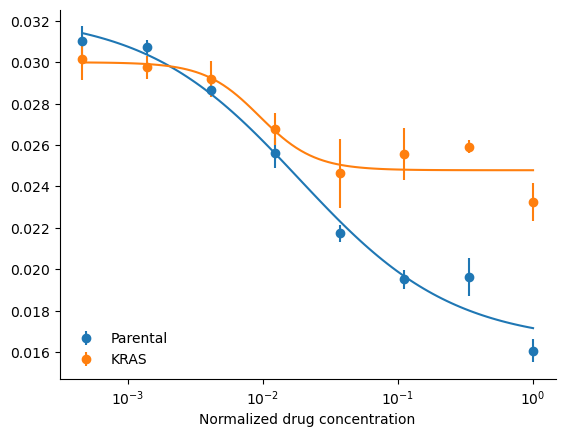

In [114]:
# kras is brown, parental is blue
# col 2 is 100% resistant, col 10 is 100% parental
exp_folder = 'data/Game_parental_vs_kras_Gef_11102023'

cg = CancerGame(exp_folder,use_sigma=False)

drug_conc_key = {0:(0,['B','C','D']),
                1/(3**6):(0,['E','F','G']),
                1/(3**5):(1,['B','C','D']),
                1/(3**4):(1,['E','F','G']),
                1/(3**3):(2,['B','C','D']),
                1/(3**2):(2,['E','F','G']),
                1/3:(3,['B','C','D']),
                1:(3,['E','F','G'])} # key is drug conc, value is tuple (plate number, rows)

parental_fit = {'avg':[],'err':[]}
resistant_fit = {'avg':[],'err':[]}

for dc in drug_conc_key.keys():

    # if dc == 1 or dc == 1/3:
    #     debug=True
    # else:
    #     debug=False

    plate_num = drug_conc_key[dc][0]
    rows = drug_conc_key[dc][1]
    # estimate resistant fitness
    data = cg.get_data(cg.plate_paths[plate_num])
    col = 2
    fit_vect = []
    for row in rows:
        key = row+str(col)
        ts = data[key]['red']
        fit_vect.append(cg.est_linear_slope(ts,exclude=2,debug=False))
    resistant_fit['avg'].append(np.nanmean(fit_vect))
    resistant_fit['err'].append(np.nanstd(fit_vect))
    # estimate parental fitness
    col = 10
    fit_vect = []
    for row in rows:
        key = row+str(col)
        ts = data[key]['green']
        fit_vect.append(cg.est_linear_slope(ts,exclude=2,debug=False))
    parental_fit['avg'].append(np.nanmean(fit_vect))
    parental_fit['err'].append(np.nanstd(fit_vect))
    
fig,ax = plt.subplots()

dc = []
cmax = 1

for i in range(8):
    dc.append(cmax/(3**i))

dc = np.flip(dc)

ax.errorbar(dc,parental_fit['avg'],yerr=parental_fit['err'],fmt='o',label='Parental')
ax.errorbar(dc,resistant_fit['avg'],yerr=resistant_fit['err'],fmt='o',label='KRAS')

ax.set_xscale('symlog',linthresh = 1/(3**7))

ax.legend(frameon=False,loc='lower left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized drug concentration')

popt = cg.fit_dr_fn(dc=dc,data=parental_fit,mutant_frac=0)

parental_dr_params.append(popt)

xfit = np.logspace(np.min(np.log10(dc)),np.max(np.log10(dc)),100)
yfit = cg.hill_fn(xfit,*popt)
ax.plot(xfit,yfit,color='tab:blue',label='Parental fit')

popt = cg.fit_dr_fn(dc=dc,data=resistant_fit,mutant_frac=1)

kras_dr_params = popt

# xfit = np.logspace(np.min(np.log10(dc)),np.max(np.log10(dc)),100)
yfit = cg.hill_fn(xfit,*popt)
ax.plot(xfit,yfit,color='tab:orange',label='Mutant fit')
# cg.plot_plate(plot_fit=True,plate_num=0)


# cg.execute()

# fig,ax = plt.subplots()

# data = cg.fitness_parental
# dr_params = cg.parental_dr_params

# ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',label='BRAF',
#             color=color_list[0])

# xfit = np.logspace(np.min(np.log10(cg.dc)),
#                     np.max(np.log10(cg.dc)),100)

# yfit = cg.hill_fn(xfit,*dr_params[0])
# ax.plot(xfit,yfit,color=color_list[0],label='BRAF fit')

# data = cg.fitness_resistant
# dr_params = cg.mutant_dr_params

# kras_dr_params = dr_params

# ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',label='KRAS',
#             color=color_list[1])

# xfit = np.logspace(np.min(np.log10(cg.dc)),
#                     np.max(np.log10(cg.dc)),100)
# yfit = cg.hill_fn(xfit,*dr_params[1])
# ax.plot(xfit,yfit,color=color_list[1],label='KRAS fit')

# ax.set_xscale('log')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# ax.set_xlabel('Normalized drug concentration')
# ax.legend(frameon=False)


In [115]:
# gmax, gmin, hc, ic_50

parental_dr_params_mean = (parental_dr_params[0][0] + parental_dr_params[1][0])/2

ic50_old = parental_dr_params_mean[-1]

ic50_new = parental_dr_params[2][-1]

ratio = ic50_new/ic50_old

kras_dr_params[-1] = kras_dr_params[-1]/ratio

Text(0, 0.5, 'Growth Rate (hr$^{-1}$)')

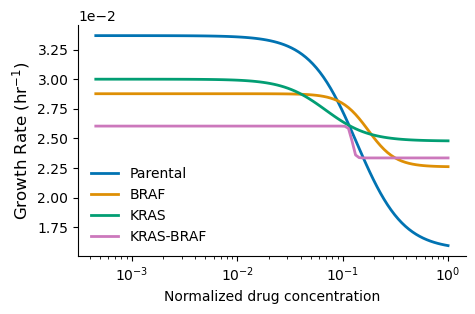

In [116]:
parental_dr_params_mean = (parental_dr_params[0][0] + parental_dr_params[1][0])/2

fig,ax = plt.subplots(figsize=(5,3))

yfit = cg.hill_fn(xfit,*parental_dr_params_mean)

ax.plot(xfit,yfit,color=color_list[0],label='Parental',linewidth=2)

yfit = cg.hill_fn(xfit,*braf_dr_params[1])

ax.plot(xfit,yfit,color=color_list[1],label='BRAF',linewidth=2)

yfit = cg.hill_fn(xfit,*kras_dr_params)

ax.plot(xfit,yfit,color=color_list[2],label='KRAS',linewidth=2)

yfit = cg.hill_fn(xfit,*kras_braf_dr_params[1])

ax.plot(xfit,yfit,color=color_list[3],label='KRAS-BRAF',linewidth=2)

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized drug concentration')
ax.legend(frameon=False)

ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

ax.set_ylabel('Growth Rate (hr$^{-1}$)',fontsize=12)

Text(0, 0.5, 'Growth Rate (hr$^{-1}$)')

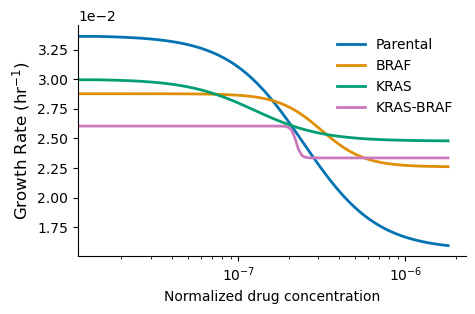

In [117]:
# mulitply all ic50s with gef_max

parental_scaled = parental_dr_params_mean
braf_scaled = braf_dr_params[1]
kras_scaled = kras_dr_params
kras_braf_scaled = kras_braf_dr_params[1]

parental_scaled[-1] = parental_dr_params_mean[-1]*gef_max
braf_scaled[-1] = braf_dr_params[1][-1]*gef_max
kras_scaled[-1] = kras_dr_params[-1]*gef_max
kras_braf_scaled[-1] = kras_braf_dr_params[1][-1]*gef_max

# generate a new drug conc vector

dc = []

for i in range(8):
    dc.append(gef_max/(2**i))

dc.append(0)
# reverse the list
dc = dc[::-1]

xfit = np.logspace(np.log10(dc[1]),np.log10(dc[-1]),100)

# append zero to the left side of xfit

xfit = np.insert(xfit,0,0)

fig,ax = plt.subplots(figsize=(5,3))

yfit = cg.hill_fn(xfit,*parental_scaled)

ax.plot(xfit,yfit,color=color_list[0],label='Parental',linewidth=2)

yfit = cg.hill_fn(xfit,*braf_scaled)

ax.plot(xfit,yfit,color=color_list[1],label='BRAF',linewidth=2)

yfit = cg.hill_fn(xfit,*kras_scaled)

ax.plot(xfit,yfit,color=color_list[2],label='KRAS',linewidth=2)

yfit = cg.hill_fn(xfit,*kras_braf_scaled)

ax.plot(xfit,yfit,color=color_list[3],label='KRAS-BRAF',linewidth=2)

# ax.set_xscale('symlog',linthresh=dc[2])

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized drug concentration')
ax.legend(frameon=False)

ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

ax.set_ylabel('Growth Rate (hr$^{-1}$)',fontsize=12)

In [118]:
# print all of the drugless growth rates

print('Parental: ',parental_scaled[0])
print('BRAF: ',braf_scaled[0])
print('KRAS: ',kras_scaled[0])
print('KRAS-BRAF: ',kras_braf_scaled[0])

# print all of the gmins

print('\n')

print('Parental: ',parental_scaled[1])
print('BRAF: ',braf_scaled[1])
print('KRAS: ',kras_scaled[1])
print('KRAS-BRAF: ',kras_braf_scaled[1])

# print all of the ic50s
print('\n')

print('Parental: ',parental_scaled[-1]*10**6)
print('BRAF: ',braf_scaled[-1]*10**6)
print('KRAS: ',kras_scaled[-1]*10**6)
print('KRAS-BRAF: ',kras_braf_scaled[-1]*10**6)

# print all of the hill coefficients

print('\n')

print('Parental: ',parental_scaled[2])
print('BRAF: ',braf_scaled[2])
print('KRAS: ',kras_scaled[2])
print('KRAS-BRAF: ',kras_braf_scaled[2])


Parental:  0.03367239418879917
BRAF:  0.028773225422397502
KRAS:  0.02999912447783911
KRAS-BRAF:  0.026045024572383016


Parental:  0.015616776691593812
BRAF:  0.02260624604718806
KRAS:  0.024783049062049266
KRAS-BRAF:  0.02335994250479992


Parental:  0.24474636759399332
BRAF:  0.31517047254246733
KRAS:  0.12460681453766959
KRAS-BRAF:  0.22207301273980917


Parental:  1.9671914050964594
BRAF:  3.3551941577772793
KRAS:  2.1348738044185733
KRAS-BRAF:  31.217362365369134


In [129]:
parental_scaled_t = [parental_scaled[0],parental_scaled[1],parental_scaled[2],parental_scaled[-1]*10**6]

kras_scaled_t = [kras_scaled[0],kras_scaled[1],kras_scaled[2],kras_scaled[-1]*10**6]

braf_scaled_t = [braf_scaled[0],braf_scaled[1],braf_scaled[2],braf_scaled[-1]*10**6]

kras_braf_scaled_t = [kras_braf_scaled[0],kras_braf_scaled[1],kras_braf_scaled[2],kras_braf_scaled[-1]*10**6]

cg.hill_fn(0.01,*kras_braf_scaled_t)

0.026045024572383016